<a href="https://colab.research.google.com/github/kxtubh/Image_Classifier/blob/main/Copy_of_cnn_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
objective: build an image classifer using cnn to classify almost any images
"""

'\nobjective: build an image classifer using cnn to classify almost any images\n'

#1.0 Import Libraries

In [ ]:

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr

#2.0 Building a data pipline

In [ ]:
data_dir = "/content/drive/MyDrive/images_cnn"

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png','svg']

In [50]:
os.listdir("/content/drive/MyDrive/images_cnn")

['Cats', 'Dogs']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



#2.1 Removing unnecessary and dodgy images

In [ ]:


for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/images_cnn/Cats/desktop.ini
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/_127844807_henry_daniella_hutchinson.jpg.webp
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector2.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector3.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector6.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector10.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector5.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector7.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector9.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector4.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Cats/vector8.svg
Image not in ext list /content/drive/MyDrive/images_cnn/Dogs/640px-African_Wild_Dog_at_Wor

#3. Load the data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/images_cnn")

Found 324 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

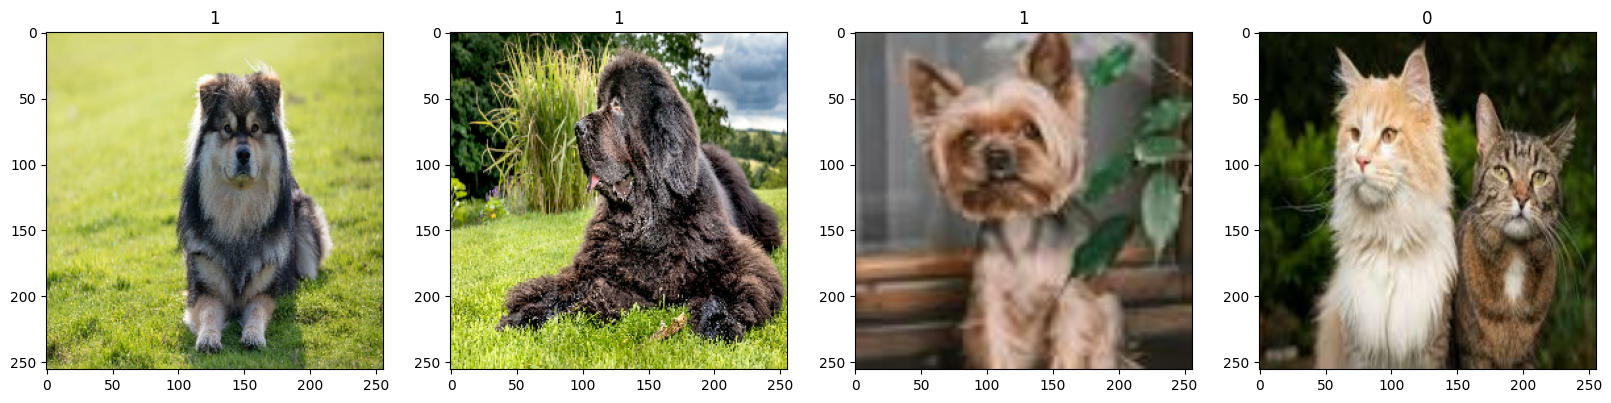

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Normalize the data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[6.43137276e-01, 6.86274529e-01, 7.09803939e-01],
          [6.40778184e-01, 6.83915436e-01, 7.07444847e-01],
          [6.30055130e-01, 6.73192382e-01, 6.96721792e-01],
          ...,
          [2.74693638e-01, 3.53125006e-01, 4.47242647e-01],
          [2.77757347e-01, 3.56188715e-01, 4.50306386e-01],
          [2.78431386e-01, 3.56862754e-01, 4.50980395e-01]],
 
         [[6.46844387e-01, 6.89981639e-01, 7.13511050e-01],
          [6.44630075e-01, 6.87767386e-01, 7.11296797e-01],
          [6.34565294e-01, 6.77702546e-01, 7.01231956e-01],
          ...,
          [2.77421296e-01, 3.55852664e-01, 4.49970335e-01],
          [2.81011611e-01, 3.59442979e-01, 4.53560621e-01],
          [2.81801462e-01, 3.60232830e-01, 4.54350501e-01]],
 
         [[6.63694859e-01, 7.06832111e-01, 7.30361521e-01],
          [6.62138820e-01, 7.05276072e-01, 7.28805482e-01],
          [6.55065894e-01, 6.98203146e-01, 7.21732557e-01],
          ...,
          [2.89819807e-01, 3.68251175e-01, 4.6236

#5. Split the data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(data)

11

#6. Neural Network Design

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
#for multilabel classification
# from tesnorflow.keras.losses import SparseCategoricalCrossentropy()

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#for multilabel classification
#model.add(Dense(1, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#for multilabel classification
#model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#7. Training

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4292 - loss: 0.9738 - val_accuracy: 0.7656 - val_loss: 0.6844
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7196 - loss: 0.6694 - val_accuracy: 0.7812 - val_loss: 0.6080
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6505 - loss: 0.6060 - val_accuracy: 0.8438 - val_loss: 0.5777
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7442 - loss: 0.5555 - val_accuracy: 0.8281 - val_loss: 0.4543
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8012 - loss: 0.4585 - val_accuracy: 0.8281 - val_loss: 0.3309
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8555 - loss: 0.3451 - val_accuracy: 0.8906 - val_loss: 0.2997
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9157 - loss: 0.2770 - val_accuracy: 0.8281 - val_loss: 0.2537
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8616 - loss: 0.2537 - val_accuracy: 0.9375 - val_loss: 0.2360
Epoch 9/50


#8. Plot Performance

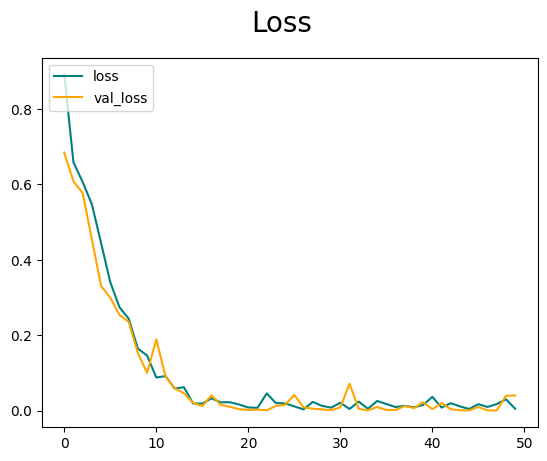

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

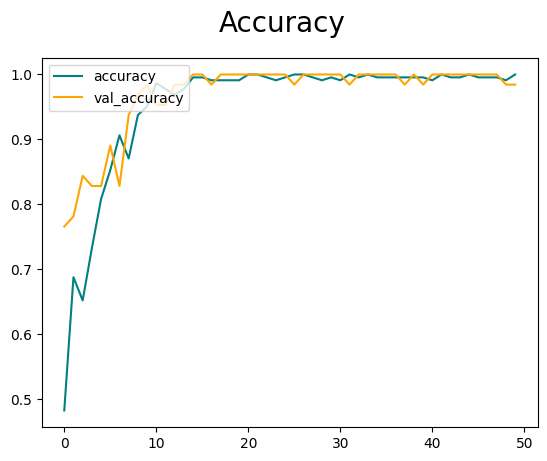

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
 X,y=batch
 yhat=model.predict(X)
 pre.update_state(y, yhat)
 re.update_state(y, yhat)
 acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


#10. Test

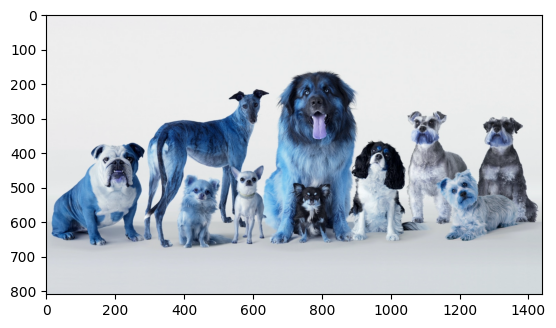

In [ ]:
img=cv2.imread("/content/drive/MyDrive/images_cnn/Dogs/020124_eg_dog_breeds_feat.jpg")
plt.imshow(img)
plt.show()

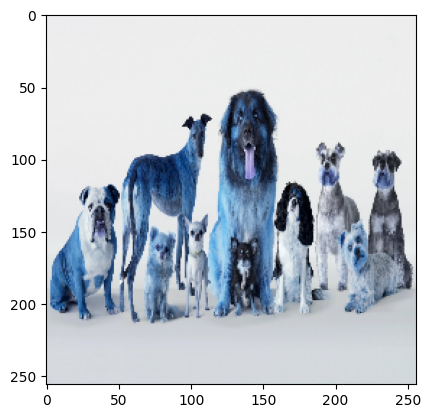

In [ ]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
yhat

array([[0.9998914]], dtype=float32)

In [ ]:
if yhat >0.5 :
 print('Predicted class is a Dog')
else:
  print('Predicted class is a Cat')

Predicted class is a Dog


#11. Save the model


In [ ]:
model.save('img_cl.h5')


In [ ]:
model.save_weights('img_cl.weights.h5')

#12 Reload the model

In [ ]:

model_path = '/content/img_cl.h5'
loaded_model = tf.keras.models.load_model(model_path)